## Heart Disease Prediction

In [537]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [538]:
# Import Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# To split the dataset
from sklearn.model_selection import train_test_split

# To find optimum parameters for the model
from sklearn.model_selection import RandomizedSearchCV

# To find optimum features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import cross validation library
from sklearn.model_selection import cross_val_score,KFold

# For evaluating the models
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [539]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [540]:
# loading dataset
df =pd.read_csv("/content/drive/MyDrive/Dataset/ML.csv")

In [541]:
# view top 5 rows of the dataset
df.head()

,age,sex,bps1,bps2,pp,fbs,hr,cp,chol,exng,sob,trn,restecg,target
0,55,0,160,100,60,0,92,1,1,1,1,1,1,1
1,55,0,130,90,40,0,96,1,1,1,1,1,1,1
2,69,0,160,90,70,0,98,1,1,1,1,1,1,1
3,35,0,100,60,40,0,82,1,1,1,1,1,1,1
4,70,0,110,70,40,0,98,1,1,1,1,1,1,1


In [542]:
# view last 5 rows of the dataset
df.tail()

,age,sex,bps1,bps2,pp,fbs,hr,cp,chol,exng,sob,trn,restecg,target
295,51,1,120,90,30,1,98,1,0,0,1,0,1,1
296,56,0,140,85,55,0,72,1,0,1,1,0,0,0
297,75,1,140,70,70,0,97,1,0,1,1,0,1,1
298,45,1,120,80,40,0,72,0,1,1,1,1,1,1
299,67,1,120,70,50,0,88,0,1,1,1,0,1,1


In [543]:
# Checking the shape of dataset
df.shape

(300, 14)

The dataset has 99 rows and 12 columns including the target. Now let's get to know about the feature names:

1. Age: age of the patients
2. Sex: Gender of the patients
3. bps: Bits Per Second
4. fbs: Fasting Blood Sugar levels.
5. hr: Heart Rate per minutes
6. cp: Cerebral palsy
7. chol: gallbladder
8. exng: Electronystagmography (ENG or electrooculography)
9. sob: Shortness of breath
10. restecg:
11. diabaties: If the patient has diabaties or not
12. target: target column either affected or not

These are the variables we need to work with. Now let's analyse the dataset to get some insight from it.

### Exploratory Data Analysis (EDA)

In [544]:
# view top 5 rows
df.head()

,age,sex,bps1,bps2,pp,fbs,hr,cp,chol,exng,sob,trn,restecg,target
0,55,0,160,100,60,0,92,1,1,1,1,1,1,1
1,55,0,130,90,40,0,96,1,1,1,1,1,1,1
2,69,0,160,90,70,0,98,1,1,1,1,1,1,1
3,35,0,100,60,40,0,82,1,1,1,1,1,1,1
4,70,0,110,70,40,0,98,1,1,1,1,1,1,1


In [545]:
# let's check if is there any null values
df.isnull().sum()

age         0
sex         0
bps1        0
bps2        0
pp          0
fbs         0
hr          0
cp          0
chol        0
exng        0
sob         0
trn         0
restecg     0
target      0
dtype: int64

In [546]:
# check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       300 non-null    int64
 1   sex       300 non-null    int64
 2   bps1      300 non-null    int64
 3   bps2      300 non-null    int64
 4   pp        300 non-null    int64
 5   fbs       300 non-null    int64
 6   hr        300 non-null    int64
 7   cp        300 non-null    int64
 8   chol      300 non-null    int64
 9   exng      300 non-null    int64
 10  sob       300 non-null    int64
 11  trn       300 non-null    int64
 12  restecg   300 non-null    int64
 13  target    300 non-null    int64
dtypes: int64(14)
memory usage: 32.9 KB


Here most all the column has the same data type which is number or integer type. But some of should be categorical type.
Let's convert them into correct type, before that, it need to be recognized which should be in categorical form. If the same value appears less than 5 times then we'll consider it as categorical.

In [547]:
# viewing the unique values of each column
for col in df.columns:
    print(col, " : ", df[col].nunique())

age  :  49
sex  :  2
bps1  :  36
bps2  :  8
pp  :  28
fbs  :  2
hr  :  26
cp  :  2
chol  :  2
exng  :  2
sob  :  2
trn  :  2
restecg   :  2
target  :  2


Most of the columns has only two unique values. Let's seperate categorical & numeric variables

In [548]:
cat_col = []
num_col = []
for i in df.drop('target', axis = 1).columns:
    if len(df[i].unique()) <=2:
        cat_col.append(i)
    else:
        num_col.append(i)

In [549]:
print("categorical feature: ", cat_col)
print("numeric feature: ", num_col)

categorical feature:  ['sex', 'fbs', 'cp', 'chol', 'exng', 'sob', 'trn', 'restecg ']
numeric feature:  ['age', 'bps1', 'bps2', 'pp', 'hr']


In [550]:
df[['sex', 'fbs', 'cp', 'chol', 'exng', 'sob', 'trn', 'restecg ']] = df[['sex', 'fbs', 'cp', 'chol', 'exng', 'sob', 'trn', 'restecg ']].astype('category')

In [551]:
# we've converted the columns into categorical form.
# Now we've only two data types categorical and integer type. "Age, bps, hr" most of the time contain continous data.
# so here we are not goint to seperate these integer type into discrete and continous type.

In [552]:
# let's see how the categorical variables are related to the target.

def view_cat(var):
    plt.figure(figsize = (8,5))
    sns.countplot(var, hue = 'target', data = df)
    plt.title("# of affected(1) & Not affected(0) based on "+ var)
    plt.xlabel(var)
    plt.ylabel('value Counts')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


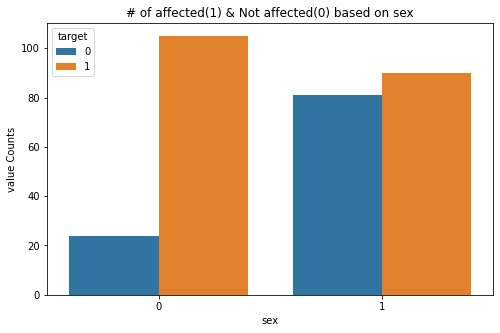

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


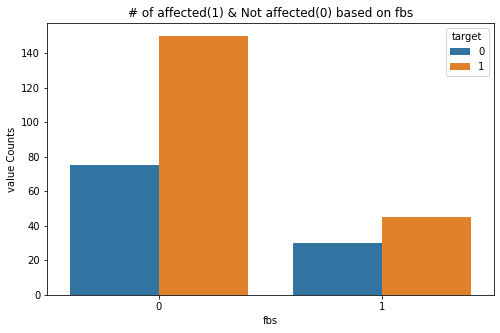

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


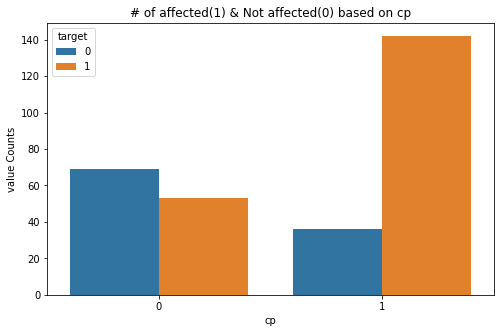

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


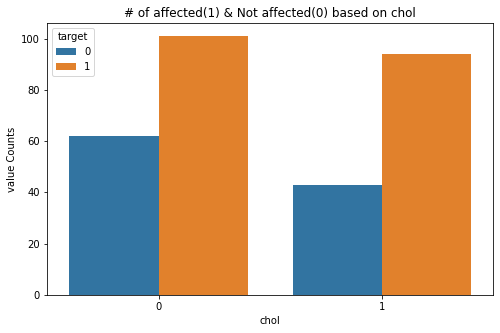

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


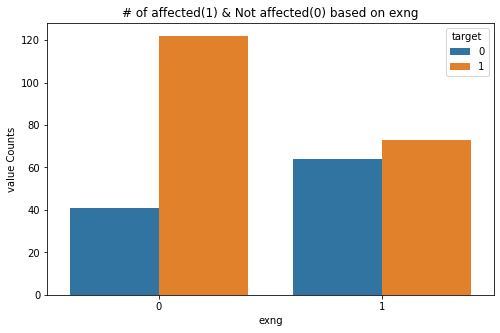

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


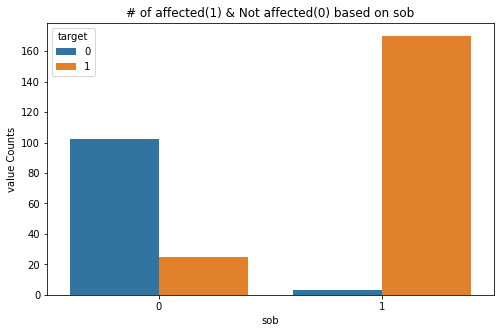

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


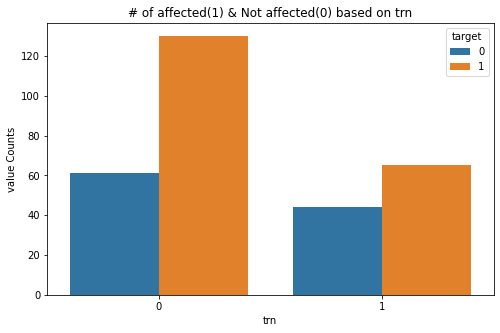

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


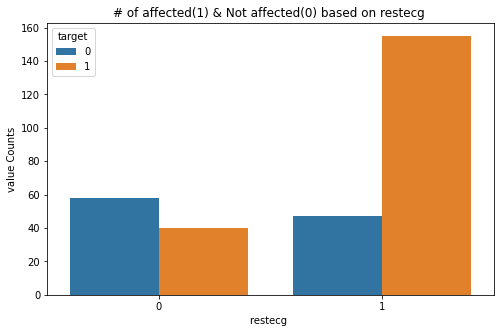

In [553]:
# let's plot for categorical variables
for cat_col in df.columns:
    if df[cat_col].dtype != 'int64':
        view_cat(cat_col)

In [554]:
# Now let's use a histagram & jointplot to see visualize the integer type
def view_int(var):
    plt.figure(figsize = (12,7))
    plt.hist(var, data = df, bins = 20, color='c')
    plt.title(var)
    plt.show()

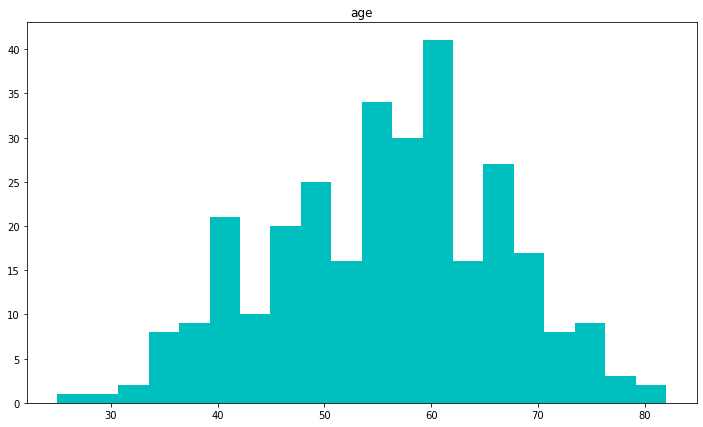

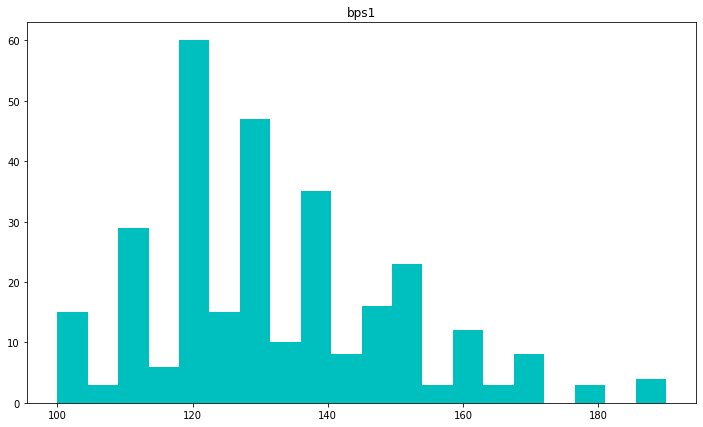

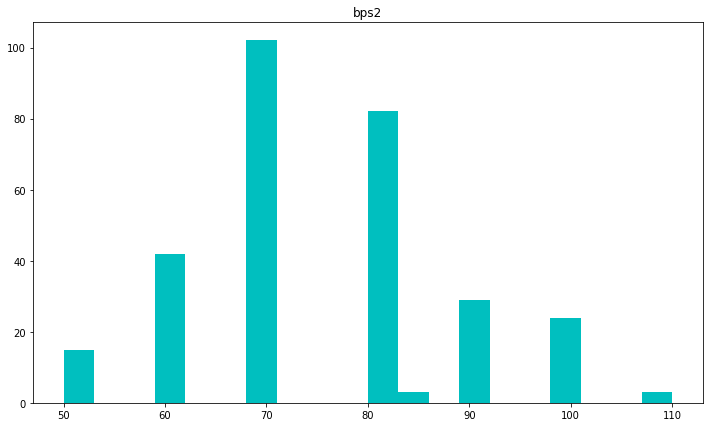

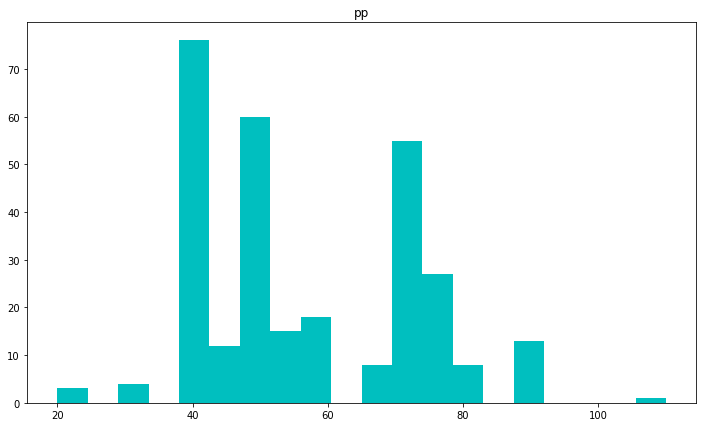

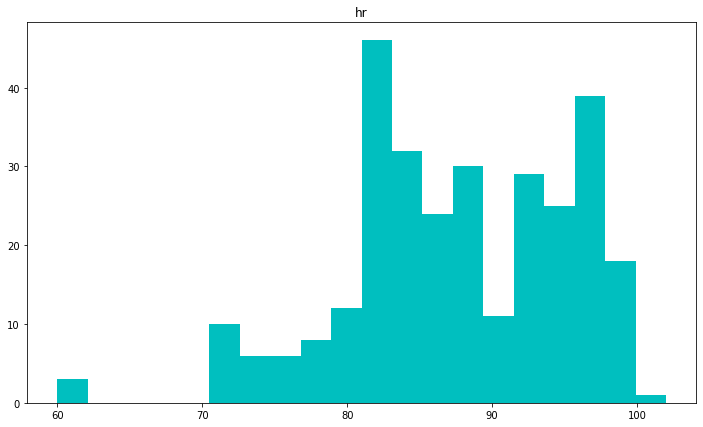

In [555]:
for int_col in df.drop('target', axis =1).columns:
    if df[int_col].dtype == 'int64':
        view_int(int_col)

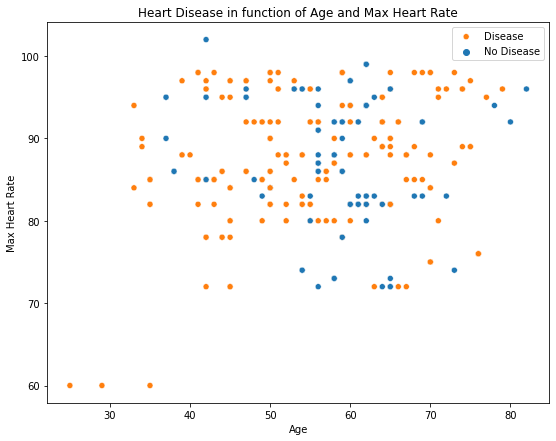

In [556]:
# Create another figure
plt.figure(figsize=(9, 7))

sns.scatterplot(x = 'age', y = 'hr', hue = 'target', data = df)

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
plt.show()

we can see that there is a almost skewed distribution for each number type data. Viewing this let's end EDA. Next part is Feature Engineering

#### Feature Engineering

Feature Engineering are related to imputaion of missing values, categorical encoding, outlier handling, feature scaling, frequent category handing etc. Previously saw that there is no missing values in the dataset so there is no need to take care of missing value. The categorical variables are already encoded, so no need of endoding again.

Now, Outliers & feature scaling. Most of time tree-based algorithm & Ensemble algorithms don't affected by outliers and don't require feature scaling. And in this notebook most of the algoritm used are tree-based and ensemble types. So there is no need to do this. Except one or two algorithms we don't need that. Let's keep them aside and move forward with the major algoritms for this one.

Here we only need to seperate the predictors and target, and also seperate the train & test set

In next part let's select the most effective variables by using feature selection.

In [557]:
# selecting target & predictors
X = df.drop('target', axis = 1)
y = df['target']

In [558]:
X = pd.get_dummies(data = df[['sex', 'fbs', 'cp', 'chol', 'exng', 'sob', 'trn', 'restecg ']], drop_first=True)

In [559]:
X['age'] = df['age']

In [560]:
X['bps1'] = df['bps1']
X['bps2'] = df['bps2']
X['hr'] = df['hr']
X['pp'] = df['pp']

In [561]:
X.head()

,sex_1,fbs_1,cp_1,chol_1,exng_1,sob_1,trn_1,restecg _1,age,bps1,bps2,hr,pp
0,0,0,1,1,1,1,1,1,55,160,100,92,60
1,0,0,1,1,1,1,1,1,55,130,90,96,40
2,0,0,1,1,1,1,1,1,69,160,90,98,70
3,0,0,1,1,1,1,1,1,35,100,60,82,40
4,0,0,1,1,1,1,1,1,70,110,70,98,40


In [562]:
# split dataset into train & test set. Here random_state will set to 0 for no randomization so that 
# each case we can get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Selection
In this notebook selectkbest & chi2 test. Using this features being selected and later on using these features more ML algorithms are being implemented. 

In [563]:
# Creating instance of selectKbest
skb = SelectKBest(chi2, k=11)

# fit the train data
scores = skb.fit(X_train, y_train)

# Creating scoring dataframe
df_scores = pd.DataFrame(scores.scores_)
df_cols = pd.DataFrame(df.columns)
score_df = pd.concat([df_cols, df_scores], axis = 1)
score_df.columns = ['Feature', 'Scores']

# printing scores
print(score_df.nlargest(11, 'Scores'))

     Feature      Scores
12  restecg   128.878324
5        fbs   65.794670
10       sob   37.306536
2       bps1   10.107698
8       chol    9.944562
0        age    9.621096
9       exng    8.097341
7         cp    7.976871
4         pp    6.090491
1        sex    3.428951
6         hr    0.597858


Here we can see that "hr" has the lowest score. so it can be removed but since we are detecting heart diseases so it must be a vital features. So let's keep all and move on.

### Machine Learning



##### Random Forest Classifier

In [564]:
rfc = RandomForestClassifier(random_state=0) # Create instance
rfc.fit(X_train, y_train) # fit the train data

RandomForestClassifier(random_state=0)

In [565]:
# predicting the output
rfc_pred = rfc.predict(X_test)

In [566]:
# model evaluation
print(f"The test accuracy score: {metrics.accuracy_score(y_test, rfc_pred)}")
print('======================================')
print(f'r2 Score: {metrics.r2_score(y_test, rfc_pred)}')
print('======================================')
print(metrics.classification_report(y_test, rfc_pred))

The test accuracy score: 1.0
r2 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        54

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



Here we can see that Random Forest Classifier performs very well. It got accuracy of 100% which is quite rare. Let's try other algorithms and see what we get.

##### LogisticRegression

In [567]:
# Creating instance
lrc = LogisticRegression()

# fit the dataset
lrc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [568]:
# predicting the output
lrc_pred = lrc.predict(X_test)

In [569]:
# model evaluation
print(f"The test accuracy score: {metrics.accuracy_score(y_test, lrc_pred)}")
print('======================================')
print(f'r2 Score: {metrics.r2_score(y_test, lrc_pred)}')
print('======================================')
print(metrics.classification_report(y_test, lrc_pred))

The test accuracy score: 0.9333333333333333
r2 Score: 0.6693121693121693
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.98      0.93      0.95        54

    accuracy                           0.93        75
   macro avg       0.91      0.94      0.92        75
weighted avg       0.94      0.93      0.93        75



##### Support Vector Machine (svc)

In [570]:
# creating instance keeping all parameter default
svc = SVC()

# fitting data
svc.fit(X_train, y_train)

SVC()

In [571]:
# predicting the output
svc_pred = svc.predict(X_test)

In [572]:
# model evaluation
print(f"The test accuracy score: {metrics.accuracy_score(y_test, svc_pred)}")
print('======================================')
print(f'r2 Score: {metrics.r2_score(y_test, svc_pred)}')
print('======================================')
print(metrics.classification_report(y_test, svc_pred))

The test accuracy score: 0.6533333333333333
r2 Score: -0.7195767195767198
              precision    recall  f1-score   support

           0       0.22      0.10      0.13        21
           1       0.71      0.87      0.78        54

    accuracy                           0.65        75
   macro avg       0.47      0.48      0.46        75
weighted avg       0.57      0.65      0.60        75



# All Model Evaluation

In [573]:
# performance of each model
performance_dict = {'Accuracy':[metrics.accuracy_score(y_test, rfc_pred),
                                metrics.accuracy_score(y_test, lrc_pred),
                               metrics.accuracy_score(y_test, svc_pred),
                              ]}

In [574]:
# performance dataframe
performance_data = pd.DataFrame(data = performance_dict, index=['Random Forest', 'Logistic Regression',
                                                               'Support Vactor Machine'])

performance_data

,Accuracy
Random Forest,1.000000
Logistic Regression,0.933333
Support Vactor Machine,0.653333


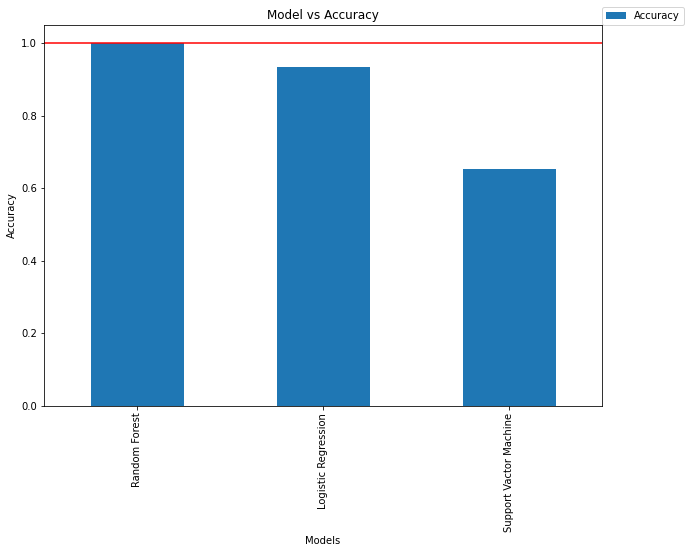

In [575]:
# plot the performance
performance_data.plot(kind = 'bar', figsize = (10,7))
plt.axhline(y = 1, color = 'red')
plt.title('Model vs Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc = (1,1))
plt.show()

Here we can that, ensemble and tree based algorithm performns very well. We see that Random Forest classifier performs very well. It got accuracy of 100%. but we are not sure that either the model is generalized. Now, let's check if the model is generalized or not and try to find optimium parameters for the model.

#### Model Optimization/ Hyper parameter Tuning

In [576]:
# Apply cross validation
kf=KFold(n_splits=10)
score=cross_val_score(rfc, X, y, cv=kf)

# view result
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         1.         0.9        0.93333333 0.96666667
 0.96666667 1.         0.93333333 1.        ]
Average Cross Validation score :0.97


Here with different dataset the model performs differently and the mean result decrease almost 2.5%. Now, let's do parameter tuning so that it can be generalized

In [577]:
# Creating parameters
n_estimators= [70, 100, 250, 500, 1000,1500]
criterion=['gini', 'entropy']
min_samples_split= [2, 5, 7]
min_samples_leaf = [1, 2, 3, 5]
max_depth = [3, 5, 9, 10, 11, None]
max_features=[0.25, 0.5, 1, None]
max_leaf_nodes=[5, 10, 25, None]

# Creating parameter dictionary


params = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth,
    'max_features': max_features,
    'max_leaf_nodes': max_leaf_nodes

}

In [578]:
# creating instance of random forest classifier
rfc_f = RandomForestClassifier()

In [579]:
# Creating instance of RandomizedSearchCV
rfc_f_search = RandomizedSearchCV(rfc_f, param_distributions=params, cv = kf, verbose=2, scoring = 'roc_auc', n_iter=5)

In [580]:
# Fitting train data
rfc_f_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   0.

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 9, 10, 11, None],
                                        'max_features': [0.25, 0.5, 1, None],
                                        'max_leaf_nodes': [5, 10, 25, None],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [70, 100, 250, 500,
                                                         1000, 1500]},
                   scoring='roc_auc', verbose=2)

In [581]:
# getting best parameters
rfc_f_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.5,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [601]:
# building final model
rfc_f = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=1, max_leaf_nodes=25, min_samples_leaf=1, 
                               min_samples_split=7, n_estimators=500, random_state=0)

rfc_f.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=1,
                       max_leaf_nodes=25, min_samples_split=7, n_estimators=500,
                       random_state=0)

In [602]:
# predicting
pred_rfc = rfc_f.predict(X_test)

In [603]:
# model evaluation
print(f"The test accuracy score: {metrics.accuracy_score(y_test, pred_rfc)}")
print('======================================')
print(f'r2 Score: {metrics.r2_score(y_test, pred_rfc)}')
print('======================================')
print(metrics.classification_report(y_test, pred_rfc))

The test accuracy score: 0.9866666666666667
r2 Score: 0.9338624338624338
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        54

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.98        75
weighted avg       0.99      0.99      0.99        75



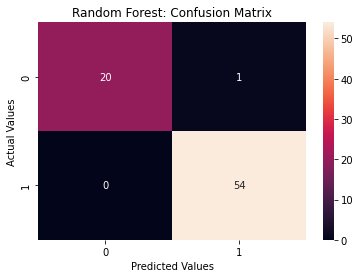

In [604]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')
plt.show()

After Parameter Tuning now the Random Forest also perform better and got an accuracy of test set decreases. But this time the model should be generalized.

In [605]:
# predict probabilities
pred_rfc_f = rfc_f.predict_proba(X_test)[:,1]
pred_rfc_f.shape

(75,)

In [606]:
# AUC-ROC curve

fpr, tpr, thresholds = roc_curve(y_test, pred_rfc_f)
auroc = roc_auc_score(y_test, pred_rfc_f)

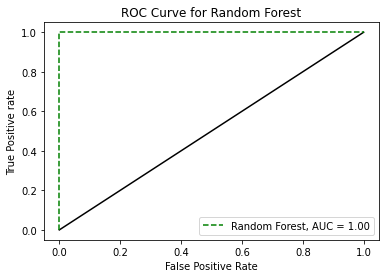

In [607]:
# Plot ROC curve
plt.plot(fpr, fpr, color = 'k')
plt.plot(fpr, tpr, linestyle='--',color='green', label='Random Forest, AUC = %0.2f'%auroc)

plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

Here we can see that the model learn quickly as the value goes from 0 to 1 very quickly. Hense the model can perform well and it is able to detect negative as negative and positive as positive.

Plotting validation curves for each hyper parameter

Maximum Depth

In [608]:
#Plotting the validation curve of training and testing scores for max_depth
from sklearn.model_selection import validation_curve
param_range= max_depth
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range, cv = kf)

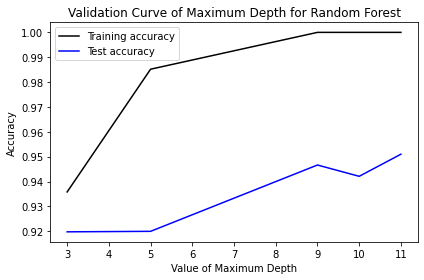

In [609]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training accuracy", color="black")
plt.plot(param_range, test_mean, label="Test accuracy", color="blue")

#Create plot
plt.title("Validation Curve of Maximum Depth for Random Forest")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

N Estimators

In [610]:
#Plotting the validation curve of training and testing scores for n_estimators
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range, cv = kf)

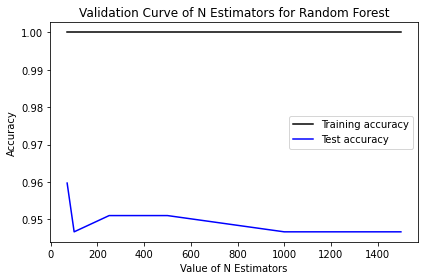

In [611]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training accuracy", color="black")
plt.plot(param_range, test_mean, label="Test accuracy", color="blue")

#Create plot
plt.title("Validation Curve of N Estimators for Random Forest")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Minimum Samples Split

In [615]:
#Plotting the validation curve of training and testing scores for min_samples_split
from sklearn.model_selection import validation_curve
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range, cv = kf)

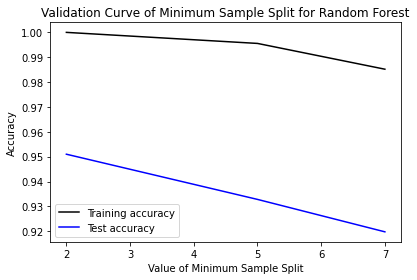

In [616]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training accuracy", color="black")
plt.plot(param_range, test_mean, label="Test accuracy", color="blue")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Random Forest")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Minimum Sample Leaf

In [617]:
#Plotting the validation curve of training and testing scores for min_samples_leaf
from sklearn.model_selection import validation_curve
param_range= min_samples_leaf
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = param_range, cv = kf)

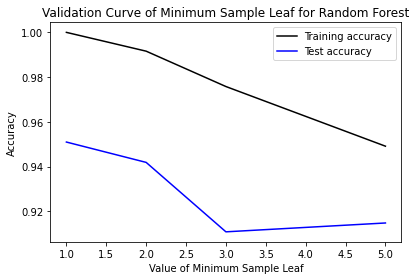

In [618]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training accuracy", color="black")
plt.plot(param_range, test_mean, label="Test accuracy", color="blue")

#Create plot
plt.title("Validation Curve of Minimum Sample Leaf for Random Forest")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Maximum Features

In [619]:
#Plotting the validation curve of training and testing scores for max_features
from sklearn.model_selection import validation_curve
param_range= max_features
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = param_range, cv = kf)

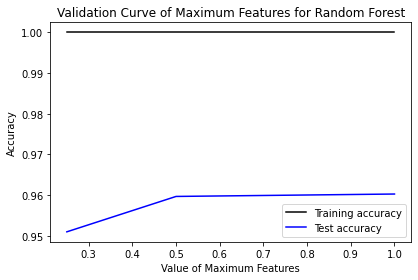

In [620]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training accuracy", color="black")
plt.plot(param_range, test_mean, label="Test accuracy", color="blue")

#Create plot
plt.title("Validation Curve of Maximum Features for Random Forest")
plt.xlabel("Value of Maximum Features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Maximum Leaf Nodes

In [623]:
#Plotting the validation curve of training and testing scores for max_leaf_nodes
from sklearn.model_selection import validation_curve
param_range= max_leaf_nodes
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_leaf_nodes', 
                                param_range = param_range, cv = kf)

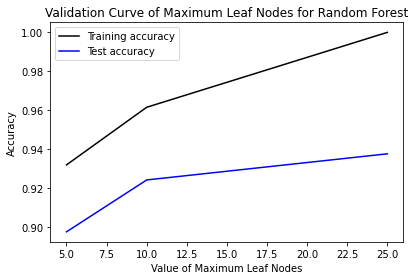

In [624]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training accuracy", color="black")
plt.plot(param_range, test_mean, label="Test accuracy", color="blue")

#Create plot
plt.title("Validation Curve of Maximum Leaf Nodes for Random Forest")
plt.xlabel("Value of Maximum Leaf Nodes")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Logistic Regression

In [625]:
# Creating instance
lrc = LogisticRegression(solver='lbfgs', max_iter=500)

# fit the dataset
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [626]:
# predicting the output
pred_lrc = lrc.predict(X_test)

In [627]:
# model evaluation
print(f"The test accuracy score: {metrics.accuracy_score(y_test, pred_lrc)}")
print('======================================')
print(f'r2 Score: {metrics.r2_score(y_test, pred_lrc)}')
print('======================================')
print(metrics.classification_report(y_test, pred_lrc))

The test accuracy score: 0.96
r2 Score: 0.8015873015873016
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.94      0.97        54

    accuracy                           0.96        75
   macro avg       0.94      0.97      0.95        75
weighted avg       0.96      0.96      0.96        75



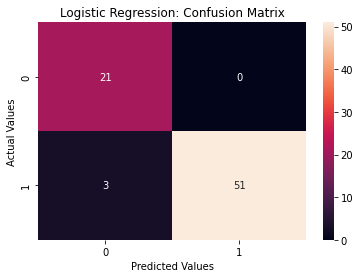

In [628]:
cm = metrics.confusion_matrix(y_test, pred_lrc)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

In [629]:
# predict probabilities
pred_lr = lrc.predict_proba(X_test)[:,1]
pred_lr.shape

(75,)

In [630]:
# AUC-ROC curve

fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
auroc = roc_auc_score(y_test, pred_lr)

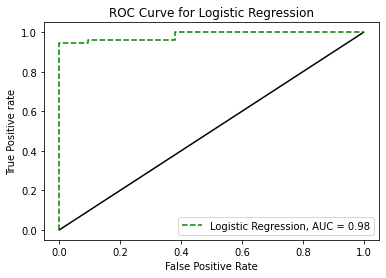

In [631]:
# Plot ROC curve
plt.plot(fpr, fpr, color = 'k')
plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression, AUC = %0.2f'%auroc)

plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

Validation Curve

In [632]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

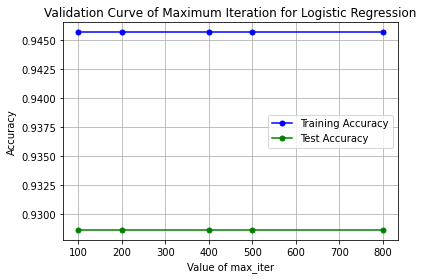

In [633]:
# Create the pipeline having steps for standardization and estimator as LogisticRegression

pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=500, random_state=0))

# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range

param_range = [100, 200, 400, 500, 800]
train_scores, test_scores = validation_curve(estimator=pipeline, X=X_train, y=y_train, cv=10, 
                                             param_name='logisticregression__max_iter', param_range=param_range)

# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the model scores (accuracy) against the paramater range
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Test Accuracy')

plt.title("Validation Curve of Maximum Iteration for Logistic Regression")
plt.xlabel('Value of max_iter')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

Support Vector Machine

In [634]:
# using GridSearchCV to find optimal hyperparameter for SVM
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, cv = 3, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.613 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [635]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [636]:
# creating instance keeping all parameter default
svc_c = SVC(C=1000, gamma=0.0001, probability=True)

# fitting data
svc_c.fit(X_train, y_train)

SVC(C=1000, gamma=0.0001, probability=True)

In [637]:
# predicting the output
svc_c_pred = svc_c.predict(X_test)

In [638]:
# model evaluation
print(f"The test accuracy score: {metrics.accuracy_score(y_test, svc_c_pred)}")
print('======================================')
print(f'r2 Score: {metrics.r2_score(y_test, svc_c_pred)}')
print('======================================')
print(metrics.classification_report(y_test, svc_c_pred))

The test accuracy score: 0.92
r2 Score: 0.6031746031746031
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.98      0.91      0.94        54

    accuracy                           0.92        75
   macro avg       0.89      0.93      0.91        75
weighted avg       0.93      0.92      0.92        75



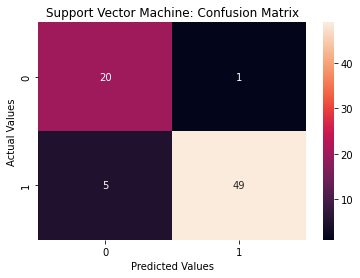

In [639]:
cm = metrics.confusion_matrix(y_test, svc_c_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Support Vector Machine: Confusion Matrix')
plt.show()

In [640]:
# predict probabilities
pred_svc = svc_c.predict_proba(X_test)[:,1]
pred_svc.shape

(75,)

In [641]:
# AUC-ROC curve

fpr, tpr, thresholds = roc_curve(y_test, pred_svc)
auroc = roc_auc_score(y_test, pred_svc)

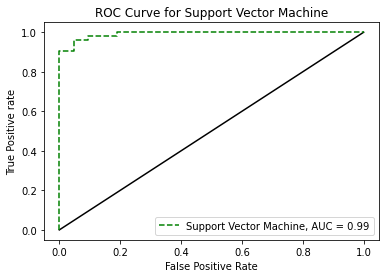

In [642]:
# Plot ROC curve
plt.plot(fpr, fpr, color = 'k')
plt.plot(fpr, tpr, linestyle='--',color='green', label='Support Vector Machine, AUC = %0.2f'%auroc)

plt.title('ROC Curve for Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

Validation Curve

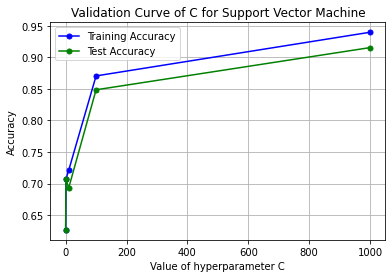

In [645]:
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range

param_range = [0.1, 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(SVC(C=1000, gamma=0.0001, probability=True), X=X_train, y=y_train, cv=10, 
                                             param_name= "C", param_range=param_range)

# Find the mean of training and test scores out of 10-fold StratifiedKFold cross validation

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the model scores (accuracy) against the paramater range
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Test Accuracy')

plt.title("Validation Curve of C for Support Vector Machine")
plt.xlabel('Value of hyperparameter C')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

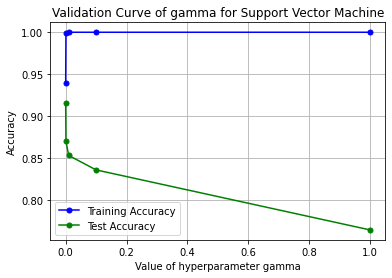

In [646]:
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range

param_range = [1, 0.1, 0.01, 0.001, 0.0001]
train_scores, test_scores = validation_curve(SVC(C=1000, gamma=0.0001, probability=True), X=X_train, y=y_train, cv=10, 
                                             param_name= "gamma", param_range=param_range)

# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the model scores (accuracy) against the paramater range
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Test Accuracy')

plt.title("Validation Curve of gamma for Support Vector Machine")
plt.xlabel('Value of hyperparameter gamma')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

All Model Evaluation

In [647]:
# performance of each model
performance_dict = {'Accuracy':[metrics.accuracy_score(y_test, pred_rfc),
                                metrics.accuracy_score(y_test, pred_lrc),
                               metrics.accuracy_score(y_test, svc_c_pred),
                              ]}

In [648]:
# performance dataframe
performance_data = pd.DataFrame(data = performance_dict, index=['Random Forest', 'Logistic Regression',
                                                               'Support Vector Machine'])

performance_data

,Accuracy
Random Forest,0.986667
Logistic Regression,0.960000
Support Vector Machine,0.920000


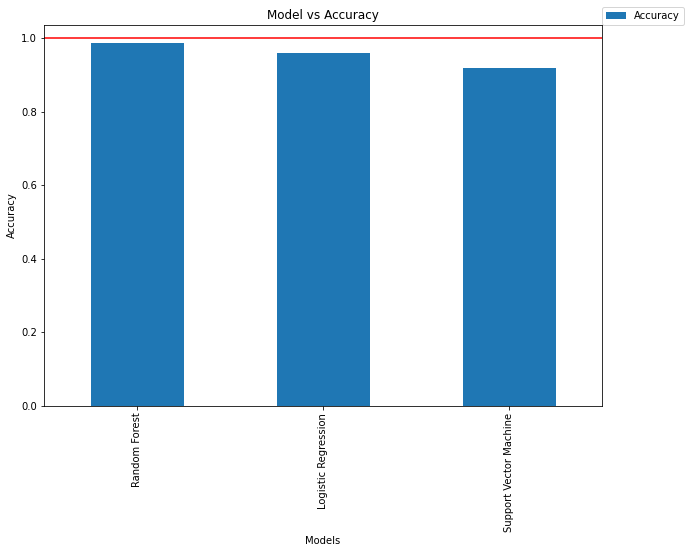

In [649]:
# plot the performance
performance_data.plot(kind = 'bar', figsize = (10,7))
plt.axhline(y = 1, color = 'red')
plt.title('Model vs Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc = (1,1))
plt.show()

Now for the final task let's see ROC curve for all other models and compare them with each other.

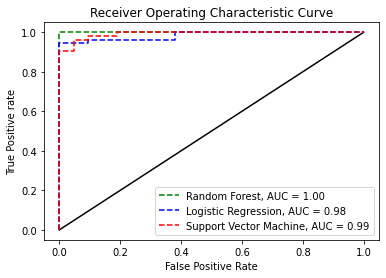

In [650]:
# Predict proba
predict_rfc = rfc_f.predict_proba(X_test)[:,1]  # random forest
predict_log = lrc.predict_proba(X_test)[:,1]  # logistic regression
predict_svm = svc_c.predict_proba(X_test)[:,1] # support vector machine

# Calculate True Positive and False Positive rate
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_rfc) # random forest
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, predict_log) # logistic regression
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predict_svm) # support vector machine

# Calculate roc_auc_score
auroc_rfc = roc_auc_score(y_test, predict_rfc) # random forest
auroc_log = roc_auc_score(y_test, predict_log) # logistic regression
auroc_svm = roc_auc_score(y_test, predict_svm) # support vector machine

# plot
plt.plot(fpr, fpr, color = 'k')
plt.plot(fpr_rfc, tpr_rfc, linestyle='--', color='green', label='Random Forest, AUC = %0.2f'%auroc_rfc)
plt.plot(fpr_log, tpr_log, linestyle='--', color='blue', label='Logistic Regression, AUC = %0.2f'%auroc_log)
plt.plot(fpr_svm, tpr_svm, linestyle='--', color='red', label='Support Vector Machine, AUC = %0.2f'%auroc_svm)

plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();